Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
{'Taegwan': array([-3.88363674e-02,  6.46570325e-02,  6.06241077e-03, -2.05837302e-02,
       -4.62804027e-02, -5.78246564e-02, -9.74705070e-02, -1.21553861e-01,
        1.08201161e-01, -8.68695900e-02,  1.94529504e-01, -4.51435409e-02,
       -1.76972017e-01, -7.68709481e-02, -3.82867530e-02,  1.81234419e-01,
       -1.42703205e-01, -1.06483854e-01, -4.36820760e-02, -2.63269618e-02,
        7.50064701e-02,  8.43579620e-02, -1.18945539e-02,  5.88937104e-03,
       -1.67439327e-01, -3.26204181e-01, -1.04343414e-01, -8.47327337e-02,
       -1.44075584e-02, -1.00097917e-02, -8.05629045e-02,  5.55281937e-02,
       -1.35219783e-01, -4.83590961e-02,  1.01543494e-01,  9.70497653e-02,
       -8.32562521e-03, -4.12461869e-02,  1.96595863e-01,  5.76669499e-02,
       -2.16095120e-01,  1.56508833e-02,  7.42580891e-02,  2.30284005e-01,
        1.92046359e-01,  4.1522860

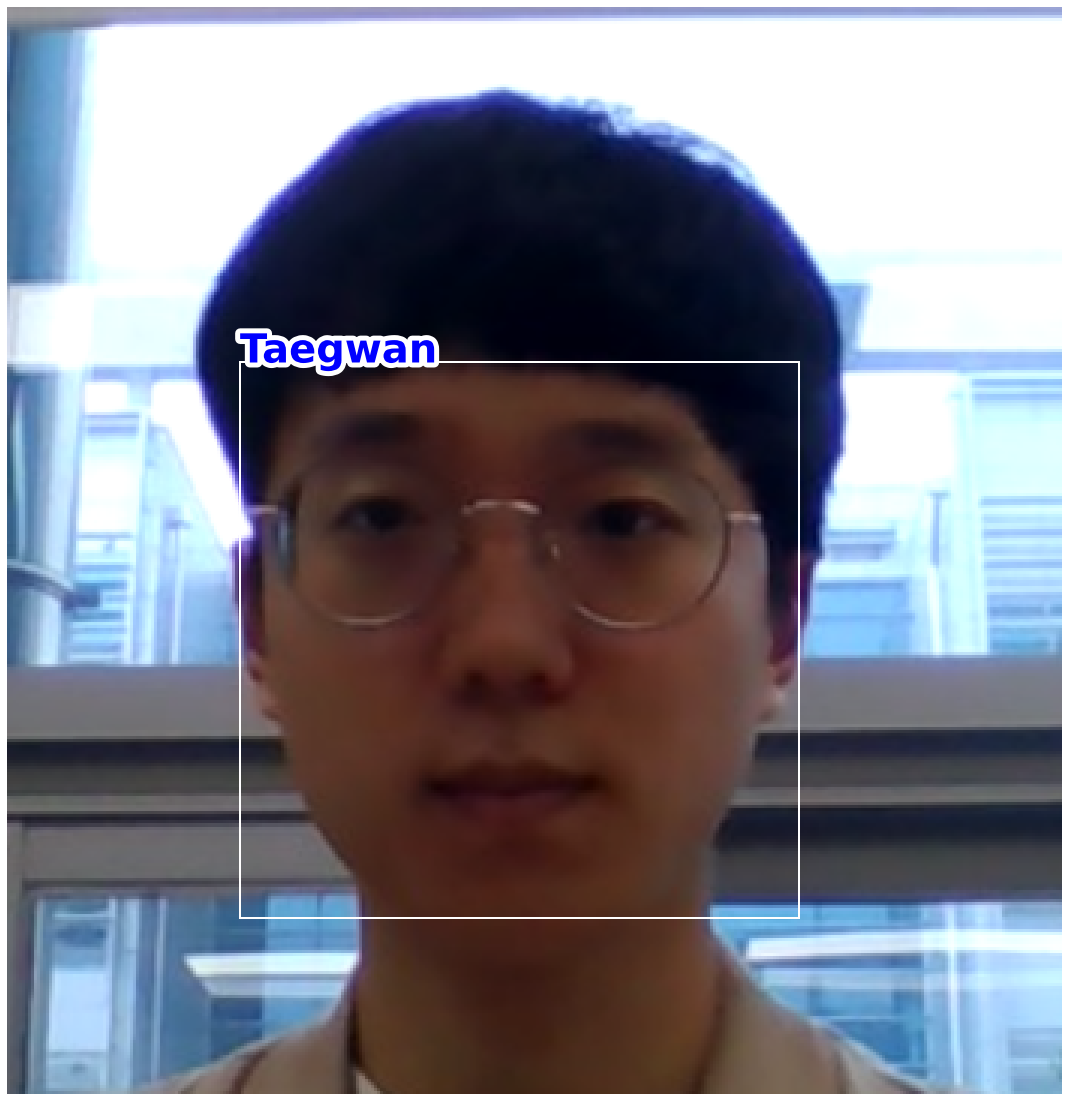

In [ ]:
import os
import dlib, cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patheffects as path_effects
from google.colab import drive
drive.mount('/content/drive')
os.chdir('drive/My Drive/test')
detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
facerec = dlib.face_recognition_model_v1('dlib_face_recognition_resnet_model_v1.dat')
def find_faces(img):
    dets = detector(img, 1)

    if len(dets) == 0:
        print('no face')
        return np.empty(0), np.empty(0), np.empty(0)


    rects, shapes = [], []
    shapes_np = np.zeros((len(dets), 68, 2), dtype=np.int)
    for k, d in enumerate(dets):
        rect = ((d.left(), d.top()), (d.right(), d.bottom()))
        rects.append(rect)

        shape = sp(img, d)

        # convert dlib shape to numpy array
        for i in range(0, 68):
            shapes_np[k][i] = (shape.part(i).x, shape.part(i).y)


        shapes.append(shape)

    return rects, shapes, shapes_np

def encode_faces(img, shapes):
    face_descriptors = []
    for shape in shapes:
        face_descriptor = facerec.compute_face_descriptor(img, shape)
        face_descriptors.append(np.array(face_descriptor))

    return np.array(face_descriptors)
img_paths = {
    'Taegwan': 'sample_image/4.PNG',

}

descs = {
    'Taegwan': None,

}

for name, img_path in img_paths.items():
    img_bgr = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    _, img_shapes, _ = find_faces(img_rgb)

    descs[name] = encode_faces(img_rgb, img_shapes)[0]

np.save('descs.npy', descs)
print(descs)

img_bgr = cv2.imread('sample_image/1.PNG')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

rects, shapes, _ = find_faces(img_rgb)
descriptors = encode_faces(img_rgb, shapes)
print(descriptors)
fig, ax = plt.subplots(1, figsize=(20, 20))
ax.imshow(img_rgb)

for i, desc in enumerate(descriptors):

    found = False
    for name, saved_desc in descs.items():
        dist = np.linalg.norm([desc] - saved_desc, axis=1)

        if dist < 0.6:
            found = True
            print('find!')

            text = ax.text(rects[i][0][0], rects[i][0][1], name,
                    color='b', fontsize=40, fontweight='bold')
            text.set_path_effects([path_effects.Stroke(linewidth=10, foreground='white'), path_effects.Normal()])
            rect = patches.Rectangle(rects[i][0],
                                 rects[i][1][1] - rects[i][0][1],
                                 rects[i][1][0] - rects[i][0][0],
                                 linewidth=2, edgecolor='w', facecolor='none')
            ax.add_patch(rect)

            break

    if not found:
        print('no face!')
        ax.text(rects[i][0][0], rects[i][0][1], 'unknown',
                color='r', fontsize=20, fontweight='bold')
        rect = patches.Rectangle(rects[i][0],
                             rects[i][1][1] - rects[i][0][1],
                             rects[i][1][0] - rects[i][0][0],
                             linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

plt.axis('off')
plt.savefig('output.jpg')
plt.show()



In [ ]:
import tensorflow as tf
print(tf.__version__)




1.15.0
